In [3]:
from tensorflow.keras.datasets import mnist

# Loading Data

In [4]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 42s 4us/step


In [14]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [18]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


# Network Architecture

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax')) #softmax return the data into required classes in a probablistic manner

# Compilation of model

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Preparing image data

In [28]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255 #converting data into the range of 0 and 1
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

# Preparing label

In [30]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels) #to do one hot encoding
test_labels = to_categorical(test_labels)

In [31]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Training model

In [32]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 324us/sample - loss: 0.2583 - accuracy: 0.9251
Epoch 2/5
60000/60000 [==============================] - 17s 284us/sample - loss: 0.1059 - accuracy: 0.9684
Epoch 3/5
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0701 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0510 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.0384 - accuracy: 0.9883


# Testing model

In [33]:
test_acc, test_loss = network.evaluate(test_images,test_labels)
print('Accuracy = ',test_acc)
print('Loss = ',test_loss)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy =  0.07271832045679912
Loss =  0.9778


# Prediction

In [34]:
network.predict(test_images)[0]

array([4.78056261e-09, 3.19986482e-10, 6.76952482e-07, 2.10607031e-05,
       2.38544996e-13, 2.00297041e-08, 1.39556735e-15, 9.99978065e-01,
       1.03607025e-08, 1.46722371e-07], dtype=float32)

# Plotting Data

In [35]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

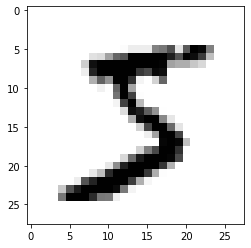

In [38]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()